# Проект e-commerce: вариант 1  (Дмитрий Велижанцев)

In [1]:
# Загружаю библиотеки (для удобства все используемые библиотеки дабавляю сюда по ходу работы)

import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
from scipy import stats as st

In [2]:
# Создал преднастройку графиков

sns.set(                                  
    font_scale =2,                        
    style      ="whitegrid",              
    rc         ={'figure.figsize':(20,7)} 
)

## 0. Подготовительный этап
Загрузка данных, описание, проверка типов, размера, проверка пропущенных значений

In [3]:
olist_customers = pd.read_csv('olist_customers_dataset.csv')

**olist_customers** - данные с id пользователей 

* customer_id — позаказный идентификатор пользователя
* customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city —  город доставки пользователя
* customer_state —  штат доставки пользователя

In [4]:
#Визуально оцениваю данные (название столбцов соответствуют справки и не требуют корректировки)

olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Проверяю типы данных, количество сток, и пропущенные значения
# В данном случае данные соответствуют типам, не содержат пропусков, а значит не требуют корректировки

olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
olist_orders = pd.read_csv('olist_orders_dataset.csv')

**olist_orders** —  данные по заказам
* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

Уникальные статусы заказов (order_status):
* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

In [7]:
#Визуально оцениваю данные  (название столбцов соответствуют справке и не требуют корректировки)

olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Проверяю типы данных, количество сток, и пропущенные значения
# В данном случае в столбцах order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, 
# order_delivered_customer_date, order_estimated_delivery_date указаны даты и лучше перевести их в тип datetime)

olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# Перевел необходимые столбцы в тип datetime

olist_orders.order_purchase_timestamp = pd.to_datetime(olist_orders.order_purchase_timestamp)
olist_orders.order_approved_at = pd.to_datetime(olist_orders.order_approved_at)
olist_orders.order_delivered_carrier_date = pd.to_datetime(olist_orders.order_delivered_carrier_date)
olist_orders.order_delivered_customer_date = pd.to_datetime(olist_orders.order_delivered_customer_date)
olist_orders.order_estimated_delivery_date = pd.to_datetime(olist_orders.order_estimated_delivery_date)

In [10]:
# Проверяю типы данных повторно, теперь все хорошо

olist_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Также видно что **в столбцах order_approved_at, order_delivered_carrier_date и order_delivered_customer_date есть пропуски даннх**, скорее всего, это нормально, так как часть заказов может быть отменена или пока что не оплачена, соотвественно заказ не может быть передан в логистическую службу и доставлен

In [6]:
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')

**olist_order_items** —  данные по товарным позициям, входящим в заказы

* order_id — уникальный идентификатор заказа (номер чека)
* order_item_id — идентификатор товара внутри одного заказа
* product_id — вид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price — цена за единицу товара
* freight_value — вес товара

In [12]:
#Визуально оцениваю данные  (название столбцов соответствуют справке и не требуют корректировки)

olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
# Проверяю типы данных, количество сток, и пропущенные значения
# В данном случае в столбце shipping_limit_date указаны даты и лучше перевести его в тип datetime)

olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
# Перевел столбец shipping_limit_date в тип datetime

olist_order_items.shipping_limit_date = pd.to_datetime(olist_order_items.shipping_limit_date)

In [8]:
# Проверяю типы данных повторно, теперь все хорошо

olist_order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

Количество столбцов отличается от предыдущих таблиц, и это нормально, так как каждый заказ может включать в себя несколько товарных позиций.

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [9]:
# Для начала объеденяем данные id пользователей с данными по заказам используя общий столбец customer_id:

customers_and_orders = olist_customers.merge(olist_orders, how='outer', on='customer_id') 

In [10]:
# Покупкой я буду считать заказы со статусом delivered (доставлен пользователю), выделю данные с этим статусом в отдельный фрейм

delivered_orders = customers_and_orders.query('order_status == "delivered"')

In [13]:
# Посчитаю количество уникальных customer_unique_id (так как они не меняются от заказа к заказу)
# у которых не более одного заказа, следовательно customer_id == 1 

customer_unique_id_1_order = delivered_orders.groupby ('customer_unique_id', as_index=False) \
                     .agg({'customer_id' : 'count'}) \
                     .query('customer_id == 1')

len(customer_unique_id_1_order['customer_unique_id'].unique())

90557

### Итог:

Получил **90 557** пользователей которые совершили покупку только 1 раз.

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [14]:
# Посмотрел на распределение статусов в целом

customers_and_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Сделаю 2 вида расчетов, первый (не доставленным считается заказ который не имеет статуса delivered:

In [51]:
# Для начала выделю все заказы которые не имеют статуса доставлен (delivered) в отдельный фрейм

not_delivered = customers_and_orders.query('order_status != "delivered"')

In [52]:
# Создал столбец year_month, поместил туда год и месяц создания заказа

not_delivered['year_month'] = not_delivered["order_purchase_timestamp"].dt.to_period("M")

/var/folders/h4/z45xthkj1kl2b2rnmkkd0rt80000gn/T/ipykernel_19200/641577683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delivered['year_month'] = not_delivered["order_purchase_timestamp"].dt.to_period("M")


<AxesSubplot:>

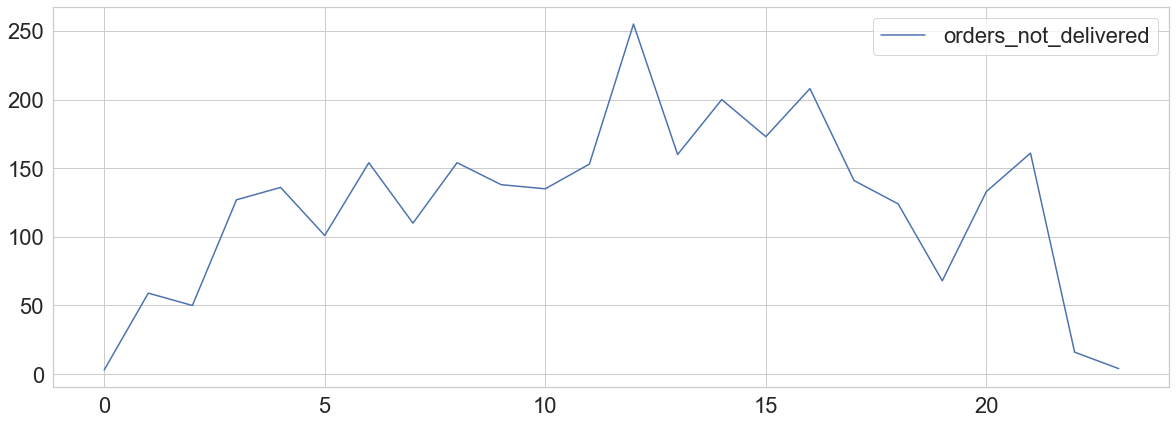

In [53]:
# Посчитал общее количество не доставленных заказов по месяцам, ради интереса построил график

orders_not_delivered_by_month = not_delivered.groupby ('year_month', as_index=False) \
                     .agg({'customer_id' : 'count'}).rename(columns={'customer_id':'orders_not_delivered'}) \
                     .sort_values('year_month')

orders_not_delivered_by_month.plot()

In [54]:
# Посчитал среднее количество не доставленных заказов в месяц за все время

round(orders_not_delivered_by_month.orders_not_delivered.mean())

123

In [55]:
# Составил таблицу не доставленных заказов в разрезе их статусов

status_not_delivered = not_delivered.groupby('order_status', as_index=False) \
                                    .agg({'customer_id' : 'count'}) \
                                    .rename(columns={'customer_id':'orders_not_delivered'}) \
                                    .sort_values('orders_not_delivered', ascending=False)

In [56]:
# Добавил столбец процентного соотношения конкретного статуса ко всем не доставленным заказам

status_not_delivered['percentage_of_total'] = round(status_not_delivered.orders_not_delivered.apply(lambda x: x / status_not_delivered.orders_not_delivered.sum()), 2)

In [57]:
#Итоговая таблица

status_not_delivered

,order_status,orders_not_delivered,percentage_of_total
5,shipped,1107,0.37
1,canceled,625,0.21
6,unavailable,609,0.21
3,invoiced,314,0.11
4,processing,301,0.10
2,created,5,0.00
0,approved,2,0.00


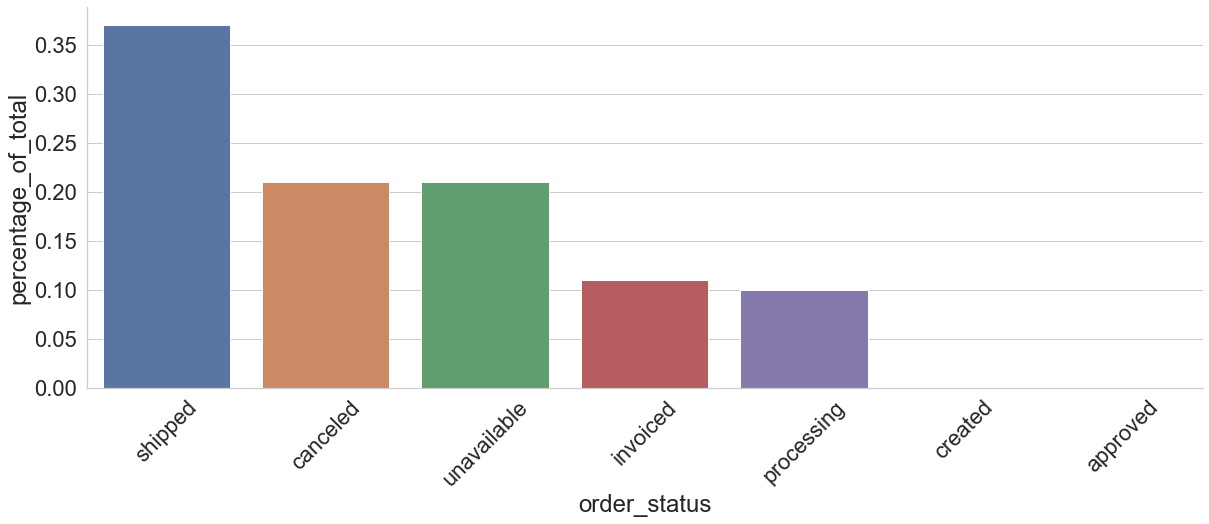

In [58]:
# Построил график относительных значений

ax = sns.barplot(data=status_not_delivered, y='percentage_of_total', x='order_status')
ax.set_xticklabels(status_not_delivered.order_status, rotation=45)
sns.despine()

### Итог:

В среднем за весь прошлый прошлый период не доставляется порядка **123** заказов в месяц, если брать в расчет все статусы кроме delivered

### Второй вариант расчета (недоставленные - это canceled и unavailable)

In [29]:
#Те же расчеты для заказов только со статусом canceled и unavailable

order_canc_and_unav = customers_and_orders[customers_and_orders['order_status'].isin(['canceled','unavailable'])]
order_canc_and_unav['year_month'] = order_canc_and_unav["order_purchase_timestamp"].dt.to_period("M")

order_canc_and_unav_by_month = order_canc_and_unav.groupby ('year_month', as_index=False) \
                     .agg({'customer_id' : 'count'}).rename(columns={'customer_id':'orders_not_delivered'}) \
                     .sort_values('year_month')

round(order_canc_and_unav_by_month.orders_not_delivered.mean())

/var/folders/h4/z45xthkj1kl2b2rnmkkd0rt80000gn/T/ipykernel_22406/970704699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_canc_and_unav['year_month'] = order_canc_and_unav["order_purchase_timestamp"].dt.to_period("M")


51

<AxesSubplot:>

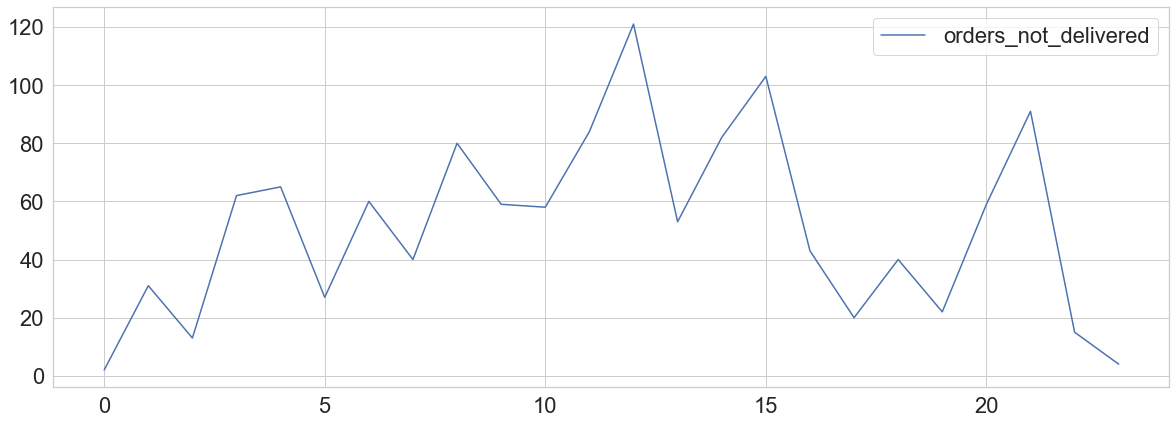

In [32]:
order_canc_and_unav_by_month.plot()

In [27]:
# Составил таблицу не доставленных заказов в разрезе их статусов

status_not_delivered_CU = order_canc_and_unav.groupby('order_status', as_index=False) \
                                    .agg({'customer_id' : 'count'}) \
                                    .rename(columns={'customer_id':'orders_not_delivered'}) \
                                    .sort_values('orders_not_delivered', ascending=False)

# Итоговая таблица

status_not_delivered_CU

,order_status,orders_not_delivered
0,canceled,625
1,unavailable,609


In [30]:
# Итоговая таблица с процентовкой

status_not_delivered_CU['percentage_of_total'] = round(status_not_delivered_CU.orders_not_delivered.apply(lambda x: x / status_not_delivered_CU.orders_not_delivered.sum()), 2)
status_not_delivered_CU

,order_status,orders_not_delivered,percentage_of_total
0,canceled,625,0.51
1,unavailable,609,0.49


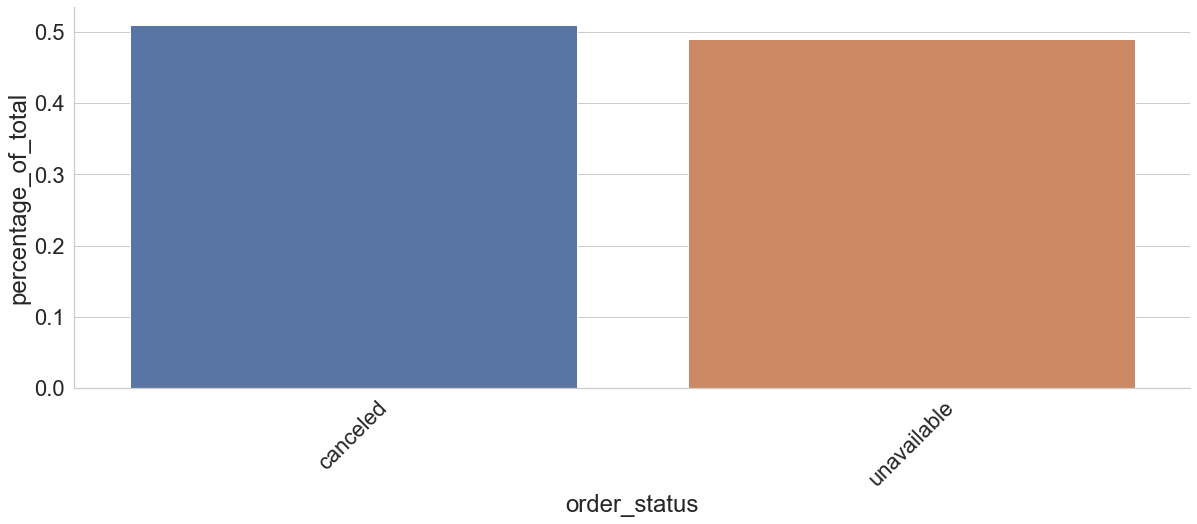

In [31]:
# Построил график относительных значений

ax = sns.barplot(data=status_not_delivered_CU, y='percentage_of_total', x='order_status')
ax.set_xticklabels(status_not_delivered_CU.order_status, rotation=45)
sns.despine()

### Итог:

В среднем за весь прошлый прошлый период не доставляется порядка **51** заказа в месяц, если брать в расчет только статусы canceled и unvailable

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [11]:
# Для начала нам нужно объеденяем полученные данные из фрейма customers_and_orders (данные с id пользователей + данные по заказам)
# с фремом olist_order_items (данные по товарным позициямв заказы), в данном случае пользуюсб колонкой order_id 

all_data = olist_order_items.merge(customers_and_orders, how='outer', on='order_id')

In [27]:
# Посмотрев данные можно заметить пропущенные значения в некоторых столбцах, чуть позже избавлюсь от них

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   order_item_id                  112650 non-null  float64       
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    113425 non-null  object        
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

Еще раз вспомню данные:

* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара
* customer_id — позаказный идентификатор пользователя
* customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city —  город доставки пользователя
* customer_state —  штат доставки пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

Уникальные статусы заказов в таблице olist_orders_dataset:

* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

In [122]:
# Создам столбец для недели в наших данных

all_data['week_day'] = all_data['order_purchase_timestamp'].dt.weekday #день недели

In [125]:
# Для каждого продукта поччитал самый часто встречаемый день недели и количество покупок в этот день.

product_mode = all_data[['product_id', 'week_day']].groupby(by='product_id', as_index=False).agg(st.mode)
product_mode.head()

,product_id,week_day
0,00066f42aeeb9f3007548bb9d3f33c38,"([6], [1])"
1,00088930e925c41fd95ebfe695fd2655,"([1], [1])"
2,0009406fd7479715e4bef61dd91f2462,"([3], [1])"
3,000b8f95fcb9e0096488278317764d19,"([2], [1])"
4,000d9be29b5207b54e86aa1b1ac54872,"([1], [1])"


In [127]:
product_counts = all_data[['product_id', 'week_day']].groupby(by='product_id', as_index=False).count().rename(columns = {'week_day':'counts'})
product_counts.head()

,product_id,counts
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


In [128]:
product_mode_and_count = pd.merge(product_mode, product_counts, on='product_id')

In [129]:
# Посчитал и вывел самоый популярный день недели, сколько раз он встречался и общее количество заказов этого продукта

product_mode_and_count.sort_values(by='counts', ascending=False).head()

,product_id,week_day,counts
22112,aca2eb7d00ea1a7b8ebd4e68314663af,"([3], [89])",527
19742,99a4788cb24856965c36a24e339b6058,"([0], [92])",488
8613,422879e10f46682990de24d770e7f83d,"([2], [93])",484
7364,389d119b48cf3043d311335e499d9c6b,"([3], [67])",392
7079,368c6c730842d78016ad823897a372db,"([4], [67])",388


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [12]:
# Оставил заказы со статусом delivered

multiple_purchases = all_data.query('order_status == "delivered"')

In [13]:
# Добавил столбцы с номером месяца и недели

multiple_purchases['month'] = multiple_purchases['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).to_period(freq='M'))
multiple_purchases['week'] = multiple_purchases['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).to_period(freq='W'))

/var/folders/h4/z45xthkj1kl2b2rnmkkd0rt80000gn/T/ipykernel_27123/138805022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_purchases['month'] = multiple_purchases['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).to_period(freq='M'))
/var/folders/h4/z45xthkj1kl2b2rnmkkd0rt80000gn/T/ipykernel_27123/138805022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_purchases['week'] = multiple_purchases['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).to_period(freq='W'))

In [14]:
multiple_purchases.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,week
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,2017-09-11/2017-09-17
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-04,2017-04-24/2017-04-30


In [105]:
# Для каждого пользователя вывел количество покупок в определенном месяце
multiple_purchases_month_week = multiple_purchases.groupby(['customer_unique_id', 'month'], as_index=False).agg({'week':'count'}).sort_values('month')

In [106]:
# Для начала посчитаю количество недель в месяцах, так как в данных нет февраля високосного года
# воспользуюсь простым самописным методом подсчета недель в месяце

weeks_of_month = {'01':31/7,
                  '02':28/7,
                  '03':31/7,
                  '04':30/7,
                  '05':31/7,
                  '06':30/7,
                  '07':31/7,
                  '08':31/7,
                  '09':30/7,
                  '10':31/7,
                  '11':30/7,
                  '12':31/7}

def calculation_of_weeks(x):
    str_month = str(x)
    month = str_month.split('-')[-1]
    return round(float(weeks_of_month[month]), 2)

In [107]:
# Дописал количество недель в месяце для каждого значения

multiple_purchases_month_week['number_of_weeks'] = multiple_purchases_month_week['month'].apply(calculation_of_weeks)

In [108]:
multiple_purchases_month_week.head()

,customer_unique_id,month,week,number_of_weeks
48814,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,3,4.29
6616,11a40baf46bd96289d1f0936dae9a256,2016-10,1,4.43
93477,fb48b86d9a78b53675c121e4ec8981ed,2016-10,3,4.43
30338,517a3d8518447c776efd430b66470e27,2016-10,1,4.43
23194,3e36312a56bdb312242490706752940b,2016-10,1,4.43


In [113]:
# Посчитал среднее количество покупок в месяц для каждого пользователя по месяцам

multiple_purchases_month_week['orders_per_week'] =  multiple_purchases_month_week.week / multiple_purchases_month_week.number_of_weeks
multiple_purchases_month_week.head()

,customer_unique_id,month,week,number_of_weeks,orders_per_week
48814,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,3,4.29,0.699301
6616,11a40baf46bd96289d1f0936dae9a256,2016-10,1,4.43,0.225734
93477,fb48b86d9a78b53675c121e4ec8981ed,2016-10,3,4.43,0.677201
30338,517a3d8518447c776efd430b66470e27,2016-10,1,4.43,0.225734
23194,3e36312a56bdb312242490706752940b,2016-10,1,4.43,0.225734


<AxesSubplot:>

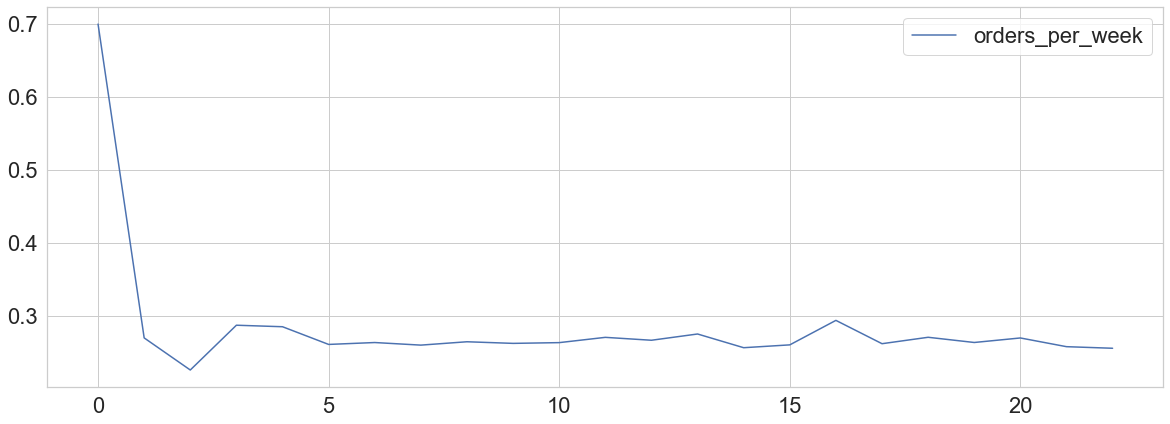

In [118]:
# Ради интереса построил график изменения количества заказов в неделю по месяцам для всех пользователей

orders_per_week_of_month = multiple_purchases_month_week.groupby('month', as_index=False) \
                                    .agg({'orders_per_week' : 'mean'})
orders_per_week_of_month.plot()

### Итог:

In [ ]:
# Получилась вот такая табличка:
multiple_purchases_month_week.head()

## 5. Используя pandas, проведем когортный анализ пользователей (в период с января по декабрь выявить когорту с самым высоким retention на 3й месяц).

In [18]:
# Cоздал датасет с первым месяцем заказа для каждого пользователя  

f_month = multiple_purchases.groupby(by='customer_unique_id', as_index=False) \
                            .min()[['customer_unique_id','month']] \
                            .rename(columns = {'month':'f_month'})
f_month.head()

,customer_unique_id,f_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [19]:
# Создал общий датафрейм для когорт

df_cohort = pd.merge(multiple_purchases,f_month, on='customer_unique_id')

In [22]:
# Добавил колонку с раздницей во времени

df_cohort['d_month'] = df_cohort['month'] - df_cohort['f_month']

# Перевел значения нового столбца в целые числа
df_cohort['d_month'] = df_cohort['d_month'].apply(lambda x: x.n) #в свойстве n - числовое значение разницы

In [28]:
df_cohort.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,week,f_month,d_month
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,2017-09-11/2017-09-17,2017-09,0
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-04,2017-04-24/2017-04-30,2017-04,0
2,c105be01f21c9df6a2579f59b95cbcd9,1.0,d2f5484cbffe4ca766301b21ab9246dd,36a968b544695394e4e9d7572688598f,2017-09-22 16:27:55,12.88,11.85,02288a47f696f3054b9ef1d5f8e73973,eb28e67c4c0b83846050ddfb8a35d051,15775,...,delivered,2017-09-18 16:12:04,2017-09-18 16:27:55,2017-09-20 20:00:24,2017-09-25 21:59:46,2017-10-04,2017-09,2017-09-18/2017-09-24,2017-04,5
3,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01,2018-01-08/2018-01-14,2018-01,0
4,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08,2018-08-06/2018-08-12,2018-08,0


In [25]:
# Для дальнейшей работы с когортами выделил нужные столбцы из датафрейма

df_for_pivot = df_cohort.groupby(by = ['f_month','d_month'], as_index=False).nunique()[['f_month','d_month','customer_unique_id']]

In [30]:
pivoted = df_for_pivot.pivot(index = 'f_month', columns='d_month')
pivoted

customer_unique_id                                                  \
d_month                 0     1     2     3     4     5     6     7     8    
f_month                                                                      
2016-09                1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10              262.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
2016-12                1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01              717.0   2.0   2.0   1.0   3.0   1.0   3.0   1.0   1.0   
2017-02             1628.0   3.0   5.0   2.0   7.0   2.0   4.0   3.0   2.0   
2017-03             2503.0  11.0   9.0  10.0   9.0   4.0   4.0   8.0   8.0   
2017-04             2256.0  14.0   5.0   4.0   6.0   6.0   8.0   7.0   7.0   
2017-05             3451.0  16.0  16.0  10.0  10.0  11.0  14.0   5.0   9.0   
2017-06             3037.0  15.0  12.0  13.0   9.0  12.0  11.0   7.0   4.0   
2017-07             3752.0  20.0  13.0   9.0  11.0   8.0  12.0   4.0   7.0   
2017-08             4057.0  28.0  14.0  11.0  14.0  21.0  12.0  11.0   6.0   
2017-09             4004.0  28.0  22.0  11.0  18.0   9.0   9.0  10.0  11.0   
2017-10             4328.0  31.0  11.0   4.0  10.0   9.0   9.0  16.0  12.0   
2017-11             7060.0  40.0  26.0  12.0  12.0  13.0   8.0  13.0   9.0   
2017-12             5338.0  11.0  15.0  18.0  14.0  11.0   9.0   1.0  10.0   
2018-01             6842.0  23.0  25.0  20.0  20.0  11.0  12.0  16.0   NaN   
2018-02             6288.0  22.0  25.0  19.0  16.0  14.0  13.0   NaN   NaN   
2018-03             6774.0  27.0  20.0  20.0   8.0   8.0   NaN   NaN   NaN   
2018-04             6582.0  39.0  20.0  16.0   9.0   NaN   NaN   NaN   NaN   
2018-05             6506.0  34.0  17.0  12.0   NaN   NaN   NaN   NaN   NaN   
2018-06             5878.0  25.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN   
2018-07             5949.0  31.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-08             6144.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                                                   
d_month    9     10    11   12   13   14   15   16   17   19   20  
f_month                                                            
2016-09   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10   1.0   NaN   1.0  NaN  1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01   NaN   3.0   1.0  5.0  3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02   3.0   2.0   5.0  2.0  3.0  2.0  1.0  1.0  3.0  NaN  NaN  
2017-03   2.0   9.0   3.0  5.0  3.0  4.0  6.0  2.0  3.0  NaN  NaN  
2017-04   4.0   6.0   2.0  1.0  1.0  2.0  2.0  3.0  NaN  NaN  NaN  
2017-05   9.0   9.0  12.0  8.0  1.0  6.0  7.0  NaN  NaN  NaN  NaN  
2017-06   6.0   9.0  11.0  5.0  5.0  7.0  NaN  NaN  NaN  NaN  NaN  
2017-07  10.0   8.0  11.0  5.0  9.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08   6.0  10.0   8.0  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09   7.0  10.0   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10   8.0   9.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11   4.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-02   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-04   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [31]:
pivoted.iloc[:,2] / pivoted.iloc[:,0]

f_month
2016-09         NaN
2016-10         NaN
2016-12         NaN
2017-01    0.002789
2017-02    0.003071
2017-03    0.003596
2017-04    0.002216
2017-05    0.004636
2017-06    0.003951
2017-07    0.003465
2017-08    0.003451
2017-09    0.005495
2017-10    0.002542
2017-11    0.003683
2017-12    0.002810
2018-01    0.003654
2018-02    0.003976
2018-03    0.002952
2018-04    0.003039
2018-05    0.002613
2018-06    0.002722
2018-07         NaN
2018-08         NaN
Freq: M, dtype: float64

### Итог:

Так как в данных очень мало повторых покупок удержание кажется очень низким. Если брать период с января по декабрь 2017, лучший показатель был в сентябре (0.005495)

## 6. Используя python, построим RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

* R - время от последней покупки пользователя до текущей даты
* F - суммарное количество покупок у пользователя за всё время
* M - сумма покупок за всё время. 


In [44]:
all_data['month'] = all_data['order_purchase_timestamp'].apply(lambda x: pd.Timestamp(x).to_period(freq='M'))

In [45]:
# Снова выделю даные для заказов со статусом delivered
rfm = all_data[all_data['order_status'] == 'delivered'] 

# Группирую по customer_unique_id
rfm_agg = rfm.groupby(by='customer_unique_id', as_index=False)

# Подсчитувваю уникальные значения и переименую столбцы
uniques = rfm_agg.nunique()[['customer_unique_id','order_id', 'product_id', 'seller_id', 'customer_city','customer_state']].rename(columns = {'order_id':'orders_per_customer',
                                                                                                                 'product_id':'products_per_customer',
                                                                                                                 'seller_id':'sellers_per_customer',
                                                                                                                 'customer_city':'different_cities',
                                                                                                                 'customer_state':'different_states'})

In [46]:
# Нахожу максимальные значения для столбцов содержащих несколько значений

rfm_max = rfm_agg.agg({'month':max,'price':sum,'customer_city':max, 'customer_state':'max'}).rename(columns={'month':'last_order_month',
                                                                                                               'price':'total_revenue',
                                                                                                              'customer_city':'city',
                                                                                                              'customer_state':'state'})

In [47]:
# Получаю итоговую таблицу

df = pd.merge(rfm_max, uniques, on = 'customer_unique_id')
df.head()

,customer_unique_id,last_order_month,total_revenue,city,state,orders_per_customer,products_per_customer,sellers_per_customer,different_cities,different_states
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,129.90,cajamar,SP,1,1,1,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,18.90,osasco,SP,1,1,1,1,1
2,0000f46a3911fa3c0805444483337064,2017-03,69.00,sao jose,SC,1,1,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,25.99,belem,PA,1,1,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,180.00,sorocaba,SP,1,1,1,1,1


In [49]:
# Бегло посмотрел на распределение

df.describe()

,total_revenue,orders_per_customer,products_per_customer,sellers_per_customer,different_cities,different_states
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,141.621480,1.033420,1.068843,1.037897,1.001210,1.000407
std,215.694014,0.209097,0.316919,0.216897,0.035077,0.020695
min,0.850000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,47.650000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,89.730000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,154.737500,1.000000,1.000000,1.000000,1.000000,1.000000
max,13440.000000,15.000000,14.000000,10.000000,3.000000,3.000000


In [55]:
# Написал функции для условного деления пользователей, поделил все очень условно так как четкой задачи нет
  
def orders(x):
    if x <= 1:
        return '1_order'
    elif x <= 3:
        return '2_3_orders'
    else:
        return 'more_3'
    
def money(x):
    if x <= 50:
        return 's'
    elif x <= 155:
        return 'l'
    else:
        return 'xl'

In [61]:
df['R'] = df['last_order_month'].apply(lambda x: x.year)

In [60]:
df['F'] = df['orders_per_customer'].apply(orders)

In [56]:
df['M'] = df['total_revenue'].apply(money)

In [70]:
# Собрал все в единый фрейм

df_rfm = df[['customer_unique_id', 'total_revenue', 'M', 'F', 'R']]

In [71]:
df_rfm.head()

,customer_unique_id,total_revenue,M,F,R
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,l,1_order,2018
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,s,1_order,2018
2,0000f46a3911fa3c0805444483337064,69.00,l,1_order,2017
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,s,1_order,2017
4,0004aac84e0df4da2b147fca70cf8255,180.00,xl,1_order,2017


In [83]:
# Теперь из этих данных можно получить любые срезы, например:
# Сумма выручки за 2017 год для людей потративших от 50 до 155 (далларов? названия валюты нет в данных), сделавших 2-3 заказа.

df_rfm[(df_rfm['R'] == 2017) & (df['M'] == 'l') & (df['F'] == '2_3_orders')]['total_revenue'].sum()

45247.16

In [85]:
# Также для примера выделю самых недавних пользователей (2018 год), покупающих часто (более 3х раз) и с высоким средним чеком (более 150)

rfm_111 = df_rfm[(df_rfm['R'] == 2018) & (df['M'] == 'xl') & (df['F'] == 'more_3')]
rfm_111.head()

,customer_unique_id,total_revenue,M,F,R
3302,08e5b38d7948d37fbb2a59fc5e175ab1,866.79,xl,more_3,2018
6918,12d8b5ed661190a3a08183644dfc504d,697.84,xl,more_3,2018
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,809.21,xl,more_3,2018
16776,2ddc001b620bd90d0f4378cfde1db887,422.35,xl,more_3,2018
19756,35ecdf6858edc6427223b64804cf028e,393.86,xl,more_3,2018
